# 1. Lightkurve Analysis of V*RR Nor


In [125]:
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from astropy.time import Time
import time

In [2]:
search = lk.search_targetpixelfile('TIC 41561453')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,SPOC,120,41561453,0.0
1,TESS Sector 12,2019,TESS-SPOC,1800,41561453,0.0


In [3]:
tpf = lk.search_targetpixelfile('TIC 41561453', exptime='long').download()
tpf

TessTargetPixelFile(TICID: 41561453)

In [4]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1624.9947623480023,22536.80078125,4.406510829925537,1605.9885976426403,1151.1358204857124,19081,12288
1625.0155956147344,22405.041015625,4.404428958892822,1605.9887573693177,1151.1377157314364,19082,12288
1625.0364288819321,21906.17578125,4.374457836151123,1605.9882866099672,1151.1394201295439,19083,12288
1625.057262148665,20708.830078125,4.284738540649414,1605.9872072310309,1151.1413084245842,19084,12288
1625.0780954158624,19037.873046875,4.1488237380981445,1605.9856629744565,1151.1444248453254,19085,12288
1625.0989286830602,17044.87109375,3.975832939147949,1605.9825386210616,1151.1479362362602,19086,12288
1625.1197619507236,14975.7880859375,3.7841038703918457,1605.9792064715853,1151.1527073371099,19087,12288
1625.140595219319,13164.6376953125,3.6084535121917725,1605.9752375920853,1151.1572615771834,19088,12288


## 1.1 Light curve plot

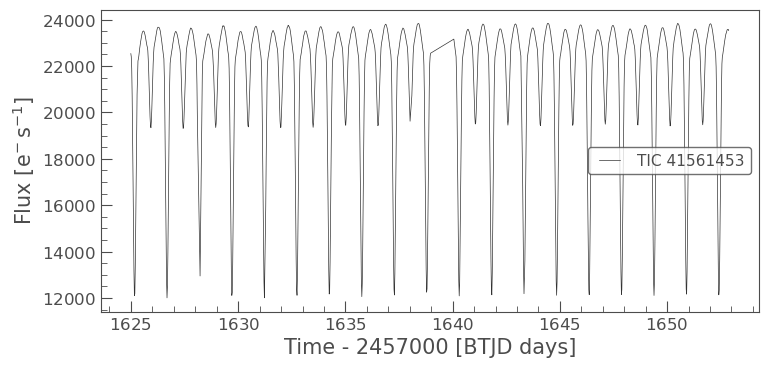

In [5]:
lc.plot();

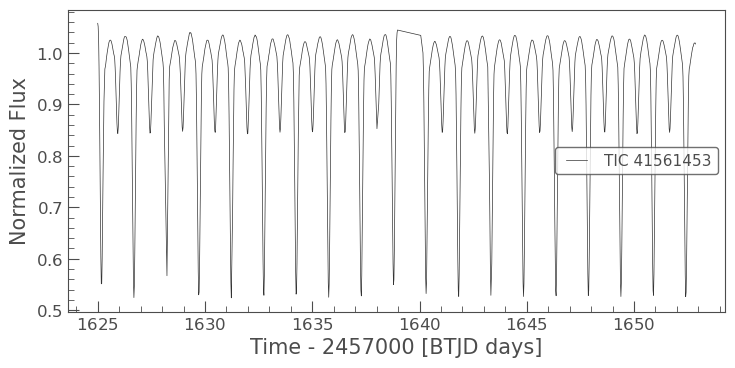

In [7]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

## 1.2. Folded Light curve plot

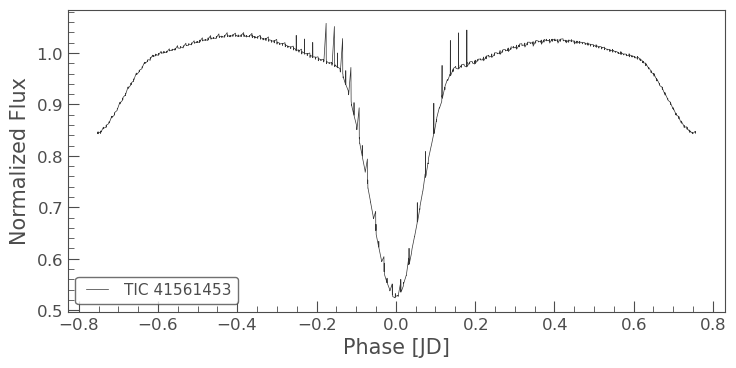

In [8]:
folded_lc = flat_lc.fold(period=1.51378596446589,  epoch_time=1625.1705841544076)
folded_lc.plot();

# 2. Itelescope Data Analysis

In [55]:
df = pd.read_csv("V_mag_measurements.csv")
pd.set_option("display.max_rows", 20)

list(df.columns)

['Label',
 'slice',
 'Saturated',
 'J.D.-2400000',
 'JD_UTC',
 'JD_SOBS',
 'HJD_UTC',
 'BJD_TDB',
 'ALT_OBJ',
 'AIRMASS',
 'CCD-TEMP',
 'EXPTIME',
 'RAOBJ2K',
 'DECOBJ2K ',
 'Source-Sky_T1',
 'Source_Error_T1',
 'Source_AMag_T1',
 'Source_AMag_Err_T1',
 'Peak_T1',
 'Source-Sky_C2',
 'Source_Error_C2',
 'Source_AMag_C2',
 'Source_AMag_Err_C2',
 'Peak_C2',
 'Source-Sky_C3',
 'Source_Error_C3',
 'Source_AMag_C3',
 'Source_AMag_Err_C3',
 'Peak_C3',
 'Source-Sky_C4',
 'Source_Error_C4',
 'Source_AMag_C4',
 'Source_AMag_Err_C4',
 'Peak_C4',
 'Source-Sky_C5',
 'Source_Error_C5',
 'Source_AMag_C5',
 'Source_AMag_Err_C5',
 'Peak_C5',
 'Source-Sky_C6',
 'Source_Error_C6',
 'Source_AMag_C6',
 'Source_AMag_Err_C6',
 'Peak_C6',
 'Source-Sky_C7',
 'Source_Error_C7',
 'Source_AMag_C7',
 'Source_AMag_Err_C7',
 'Peak_C7',
 'Source-Sky_T8',
 'Source_Error_T8',
 'Source_AMag_T8',
 'Source_AMag_Err_T8',
 'Peak_T8',
 'Source-Sky_T9',
 'Source_Error_T9',
 'Source_AMag_T9',
 'Source_AMag_Err_T9',
 'Peak_T9',

In [57]:
df_useful = df[['slice', 'JD_UTC','J.D.-2400000',
 'Source_AMag_T1',
 'Source_AMag_Err_T1',
 'Source_AMag_C2',
 'Source_AMag_Err_C2',
 'Source_AMag_C3',
 'Source_AMag_Err_C3',
 'Source_AMag_C4',
 'Source_AMag_Err_C4',
 'Source_AMag_T8',
 'Source_AMag_Err_T8',
 'Source_AMag_T9',
 'Source_AMag_Err_T9', 
 'Source_AMag_T10',
 'Source_AMag_Err_T10',
 'Source_AMag_T11',
 'Source_AMag_Err_T11'          
 ]]

## 2.1. Curve Fitting 


In [13]:
def lin_func(x, a, b):
      return a * x + b 

In [28]:
def sqr_func(x, a, b, c):
      return a*x**2 + b*x + c 

/var/folders/sl/lr3h2xdj455ctqq6vn1834000000gn/T/ipykernel_859/4106835842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['J.D.-2460082'] = df_useful['J.D.-2400000']-60082


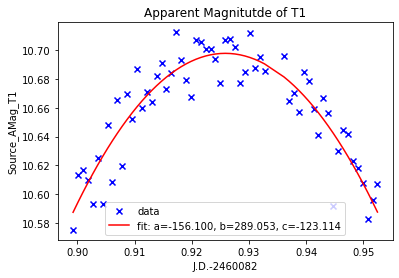

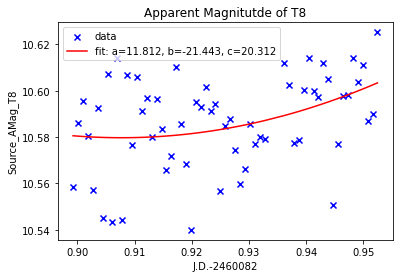

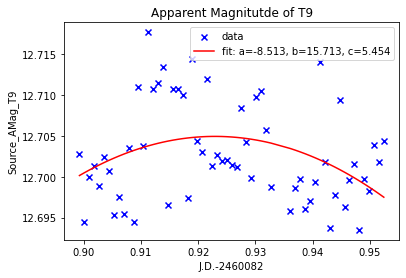

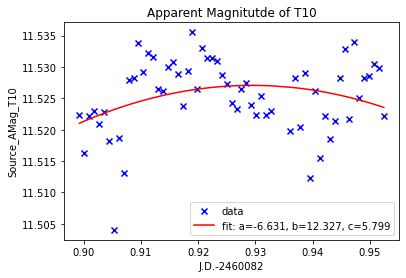

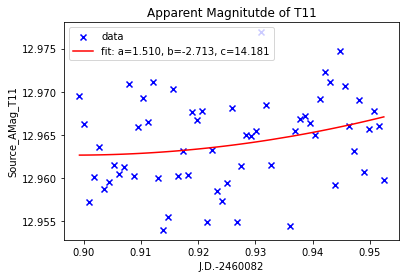

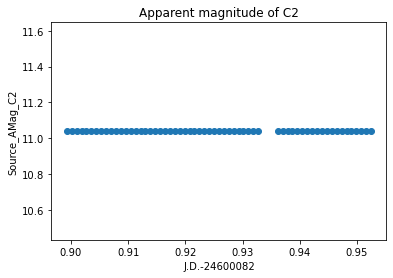

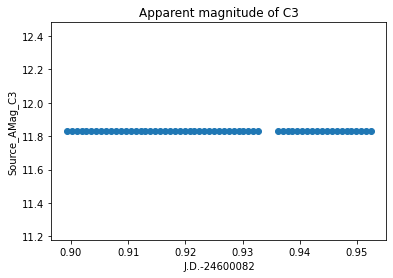

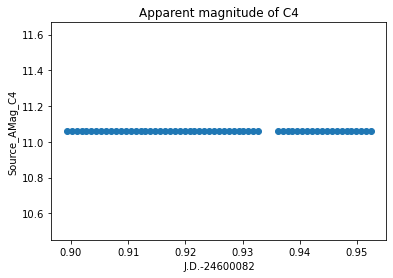

In [262]:
df_useful['J.D.-2460082'] = df_useful['J.D.-2400000']-60082

comp_mag = [
 'Source_AMag_C2',
 'Source_AMag_C3',
 'Source_AMag_C4']


check_mag = [
 'Source_AMag_T8',
 'Source_AMag_T9', 
 'Source_AMag_T10',
 'Source_AMag_T11']



T1_coefficients = plot_fit(x = 'J.D.-2460082', y = 'Source_AMag_T1')


for star in check_mag:
    plot_fit(x = 'J.D.-2460082', y = star)

for star in comp_mag:
    plt.scatter(x=df_useful['J.D.-2460082'],y=df_useful[star])
    plt.xlabel('J.D.-24600082')
    plt.ylabel(star)
    parts = star.split('_')
    target_name = parts[2]
    plt.title(f'Apparent magnitude of {target_name}')
    plt.savefig(f'{target_name}_light_curve')
    plt.show()
    

In [261]:
def plot_fit(x, y):
    xdata = df_useful[x]
    ydata = df_useful[y]
    popt, pcov = curve_fit(sqr_func, xdata, ydata)
    
    parts = y.split('_')
    target_name = parts[2]
    
    
    plt.scatter(x=xdata, y=ydata,marker='x', color ='b', label = 'data')
    plt.plot(xdata, sqr_func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.title(f'Apparent Magnitutde of {target_name}')
    
    plt.savefig(f"{target_name}_light_curve")
    plt.show()
    return popt

## 2.2. Finding time of conjuction


In [114]:
# best fit function
# derivative of best fit
T1_dervivative_coefficients = [2*T1_coefficients[0],T1_coefficients[1]] 
# max in JD -2460082
max_T1 = np.roots(T1_dervivative_coefficients)[0]
# max in JD 
max_T1_JD = max_T1 +2460082

In [170]:
print(f"UTC: {jd_to_isot(max_T1_JD)} \n JD: {max_T1_JD}")

UTC: 2023-05-18T10:13:14.456390 
 JD: 2460082.925861764


## 2.3. Predicted time of conjuction


In [172]:
#data from TESS
P = 1.5137671 
t0=2452500.463


predicted_time = Time('2023-5-18T00:00:00', format = 'isot')

# number of eclipses since first time of conjuction
N_periods_since_t0 = np.ceil((predicted_time.jd - t0)/P)
predicted_time_JD = t0+N_periods_since_t0*P
print(f"UTC: {jd_to_isot(predicted_time_JD)} \n JD: {predicted_time_JD}")

UTC: 2023-05-18T10:08:15.696956 
 JD: 2460082.9224039


## 2.4 Error between predicted and measured 

In [174]:
error = abs(predicted_time_JD-max_T1_JD)
print(f"The discrepency between calculated and observed is {error} JD")

The discrepency between calculated and observed is 0.0034578638151288033 JD


In [151]:
def isot_to_jd(date):
    time = Time(date, format = 'isot')
    return time.jd

In [161]:
def jd_to_isot(date):
    time = Time(date, format = 'jd')
    return time.utc.datetime.isoformat()
    

In [263]:
error*24*60

4.979323893785477

# 3. O-C plot


In [179]:
ocdf = pd.read_csv("plot-data.csv")


Index(['x', ' y'], dtype='object')

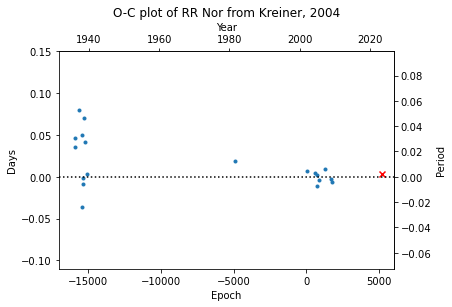

In [264]:
fig, ax1 = plt.subplots()

ax1.plot(ocdf['x'], ocdf[' y'], '.')
ax1.set_xlim([-17000, 6000])
ax1.set_ylim([-0.11, 0.15])
ax2 = ax1.secondary_xaxis('top', functions= (epoch2year, epoch2year),label = 'years')
ax3 = ax1.secondary_yaxis('right', functions= (day2period, day2period),label = 'years')
ax1.axhline(y=0, color='black', linestyle='dotted')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Year')
ax1.set_ylabel('Days')
ax3.set_ylabel('Period')
plt.title('O-C plot of RR Nor from Kreiner, 2004')
date_in_epoch = (2023.3-2001.92)/1.51377*365.25
ax1.scatter(x=date_in_epoch, y=error, color = 'r', marker='x')
plt.savefig('OC-Plot')

In [208]:
def epoch2year(x):
    return 2001.92 + 1.51377*x/365.25

In [219]:
def day2period(x):
    return x/1.51377